![title](DEP_LOGO_2.jpg)

# Trend Station Water Quality Data 
## Web Application Demo

In [1]:
#HIDDEN

import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
import csv
from geopy.geocoders import Nominatim
from time import sleep
import folium
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
import seaborn as sns
from scipy import stats

In [2]:
#HIDDEN

dfhead = pd.read_csv('gm_export_TS_Location.csv')
dfhead = dfhead.fillna(0)
dfheadloc = dfhead[dfhead.latitude != 0]

geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Flatwoods, WV")

longitude = location.longitude
latitude = location.latitude

# create map of West Virginia using latitude and longitude values
ts_locations = folium.Map(location=[latitude, longitude], tiles="OpenStreetMap", zoom_start=7.4)

# add markers to map
for lat, lng, label in zip(dfheadloc['latitude'], dfheadloc['longitude'], dfheadloc['station_id']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=True).add_to(ts_locations)  

ts_locations

## Trend Station Location

In [3]:
#HIDDEN

dfhead = pd.read_csv('gm_export_TS_Location.csv')
dfhead = dfhead.fillna(0)
dfheadloc = dfhead[dfhead.latitude != 0]


def unique_sorted_values(array):
    unique = array.unique().tolist()
    unique.sort()
    return unique

dropdown_stations_id = widgets.Dropdown(options = unique_sorted_values(dfheadloc.station_id), description='Trend Station')

output_two = widgets.Output()



def common_filtering(station):
    
    output_two.clear_output()
    
    
    global common_filter
    common_filter = dfheadloc[(dfheadloc.station_id == station)]
    
    with output_two:
        display(common_filter)
        
    
        
def dropdown_stations_id_eventhandler(change):
    common_filtering(change.new)

    
dropdown_stations_id.observe(dropdown_stations_id_eventhandler, names='value')
    
display(dropdown_stations_id)


Dropdown(description='Trend Station', options=('TS001', 'TS002', 'TS003', 'TS004', 'TS005', 'TS006', 'TS007', …

In [4]:
#HIDDEN
display(output_two)

Output()

## Trend Station Data

In [5]:
#HIDDEN

df_comb = pd.read_csv('TS_New_Combined_Final.csv')
df_comb = df_comb.fillna(0)
df_comb['test_batch_id'] = pd.to_datetime(df_comb['test_batch_id'], format="%m/%d/%Y")
df_comb['result_value'] = pd.to_numeric(df_comb['result_value'])
df_comb = df_comb.sort_values(by=['station_id', 'test_batch_id'])
df_comb = df_comb.set_index('test_batch_id')

ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_stations = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_comb.station_id), description='Trend Station')
dropdown_param = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_comb.param_name), description='Parameter')

output_three = widgets.Output()
plot_output = widgets.Output()


def common_filtering1(station, param):
    
    output_three.clear_output()
    plot_output.clear_output()
    
    if (station == ALL) & (param == ALL):
        global common_filter1
        common_filter1 = df_comb
    elif (station == ALL):
        common_filter1 = df_comb[df_comb.param_name == param]
    elif (param == ALL):
        common_filter1 = df_comb[df_comb.station_id == station]
    else:
        common_filter1 = df_comb[(df_comb.station_id == station) & (df_comb.param_name == param)]
    
    with output_three:
        display(common_filter1)
        
    with plot_output:
        if param == ALL or station == ALL:
            print("No Available Plots for the Selected Station/Parameter Combination!")
        else:
            plt.figure(figsize=(20,8));
            plt.plot(common_filter1['result_value'], 'go--', linewidth=1, markersize=6);
            plt.grid();
            plt.ylabel(param, fontsize=15);
            plt.xlabel('Date', fontsize=15);
            plt.title(station, fontsize=25);
            plt.show();


def dropdown_stations_eventhandler(change):
    common_filtering1(change.new, dropdown_param.value)
    
def dropdown_param_eventhandler(change):
    common_filtering1(dropdown_stations.value, change.new)
    
dropdown_stations.observe(dropdown_stations_eventhandler, names='value')
dropdown_param.observe(dropdown_param_eventhandler, names='value')
    
display(dropdown_stations)
display(dropdown_param)

Dropdown(description='Trend Station', options=('ALL', 'TS001', 'TS002', 'TS003', 'TS004', 'TS005', 'TS006', 'T…

Dropdown(description='Parameter', options=('ALL', 'ALKALINITY', 'ALUMINUM', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM'…

In [6]:
#HIDDEN
display(output_three)

Output()

In [7]:
#HIDDEN
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
display(plot_output)

Output()

## Trend Station Statistics

Need to convert DataFrame structure prior to this step!

In [65]:
common_filter1.reset_index(inplace=True)
group = common_filter1.groupby('param_name')

df2 = pd.DataFrame(group.apply(lambda x: x['test_batch_id'].unique()))
df2.reset_index(inplace=True)
df2 = df2.rename({0: 'DATES'}, axis='columns')
df2

,param_name,DATES
0,ALKALINITY,"[2015-12-01T00:00:00.000000000, 2016-02-01T00:..."
1,ALUMINUM,"[2015-12-01T00:00:00.000000000, 2016-02-01T00:..."
2,ANTIMONY,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."
3,ARSENIC,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."
4,BERYLLIUM,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."
5,BI-CARBONATE,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."
6,CADMIUM,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."
7,CALCIUM,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."
8,CARBONATE,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."
9,CHROMIUM,"[2016-02-01T00:00:00.000000000, 2016-04-01T00:..."


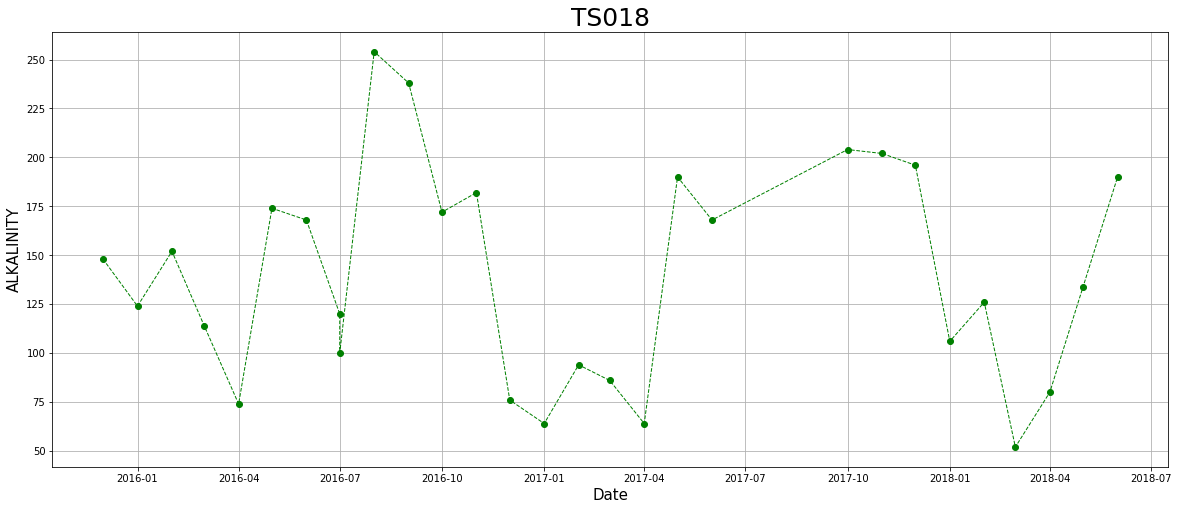

In [46]:
plt.figure(figsize=(20,8));
plt.plot(common_filter1[str(dropdown_param.value)], 'go--', linewidth=1, markersize=6);
plt.grid();
plt.ylabel(str(dropdown_param.value), fontsize=15);
plt.xlabel('Date', fontsize=15);
plt.title(str(dropdown_stations.value), fontsize=25);
plt.show();